# Flux evolution plotter

This notebook contains the script used to produce the normalized fluid flux plots analyzed in this work.
Please note that the files imported for this purpose are already processed (i.e. integrated over the selected area). for details on this procedure please check the "FluxProcessing.py" module.

First, we import the libraries we use generating the plots, as well as the files containing the time steps equivalence to real time in each simulation.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec
import matplotlib.lines as mlines

path = 'models/'
times_01 = np.loadtxt(path+'timesteps_SR_01.txt')
times_1 = np.loadtxt(path+'timesteps_SR_1.txt')
times_10 = np.loadtxt(path+'timesteps_SR_10.txt')

The times_* files contain the information of: times steps of the simulations, seconds since fault slip starts, minutes since fault slip starts, hours since fault slip starts, and days since fault slip starts.

Then, we load the flux variation results for each model.

In [58]:
models = ['elastic_SR_1','SR_01','SR_1','SR_10','yield_SR_1','yield_SR_1_25','yield_SR_1_15','shear_SR_1','viscosity_SR_1','permeability_SR_1','permeability_SR_1_homo','permeability_SR_1_new']

# We then create a variable for each model's flux evolution

models_dict = dict()
for model in models:
    models_dict[model] = np.loadtxt(path+model+'.txt')

We proceed to normalize the flux variation for each model with respect to the stationary flux. We consider stationary state is reached at the time step before fault slip starts. For all models but SR_10, this is step 17. For model SR_10, is 25. Also, times are sliced to start on stationary state.

In [59]:
for model in models:
    if model == 'SR_10':
        models_dict[model] = models_dict[model][25:]/models_dict[model][25]
    models_dict[model] = models_dict[model][17:]/models_dict[model][17]

times_01 = times_01[17:,4]
times_1 = times_1[17:,4]
times_10 = times_10[25:,4]

Finally, we make the plot. This notebook is set to produce Figure 5b. However it can be modified to show whatever combination of models the user wants.

<ipython-input-60-5652a13011f7>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


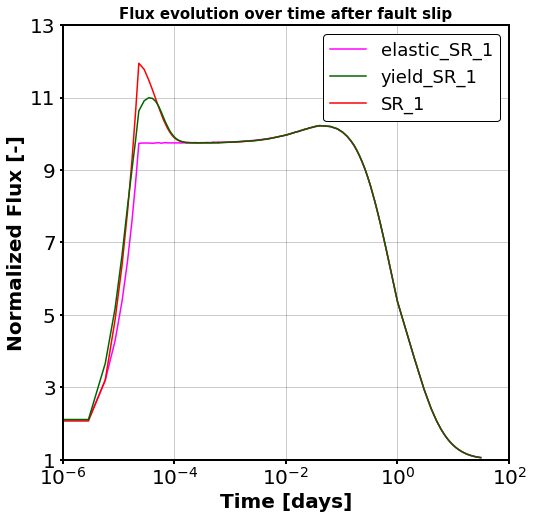

In [60]:
legends_dict = dict()
colors_dict = dict()

# We define the colors for each model. This list follows the same order as the models list
colors = ['magenta','green','red','blue','darkgreen','turquoise','slateblue','cyan','olivedrab','dodgerblue','hotpink','silver']
for i in range(len(models)):
    legends_dict[models[i]] = mlines.Line2D([0],[0],color=colors[i],label=models[i])
    colors_dict[models[i]] = colors[i]
    
legend_elements = [legends_dict['elastic_SR_1'],legends_dict['yield_SR_1'],legends_dict['SR_1']]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_yticks([1,3,5,7,9,11,13],minor=False)
ax.grid(True, which="major", ls="-", lw=1, color='k',alpha=0.2)
ax.grid(True, which="minor", ls="-", alpha = 0.05)
ax.plot(times_1,models_dict['elastic_SR_1'],colors_dict['elastic_SR_1'])
ax.plot(times_1,models_dict['SR_1'],colors_dict['SR_1'])
ax.plot(times_1,models_dict['yield_SR_1'],colors_dict['yield_SR_1'])
ax.set_xscale('log')
ax.set_xticks([1e-6,1e-4,1e-2,1e0,1e2],minor=False)
ax.set_xlabel('Time [days]',fontsize=20,fontweight='bold')
ax.set_ylabel('Normalized Flux [-]',fontsize=20,fontweight='bold')
ax.set_title('Flux evolution over time after fault slip',fontsize=15,fontweight='bold')
ax.set_xlim(1e-6,1e2)
ax.set_ylim(1,13)
ax.tick_params(width=2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.tick_params(axis='both', labelsize=20)
ax.legend(handles = legend_elements, loc = 1, ncol = 1,fontsize=18,framealpha=1,edgecolor='k')
fig.show()